In [1]:
import matplotlib.pyplot as plt
from zoology.analysis.utils import fetch_wandb_runs

In [2]:
df = fetch_wandb_runs("geometric-meta-learning/zoology", {"tags": {"$in": ["fig2-sweep"]}})

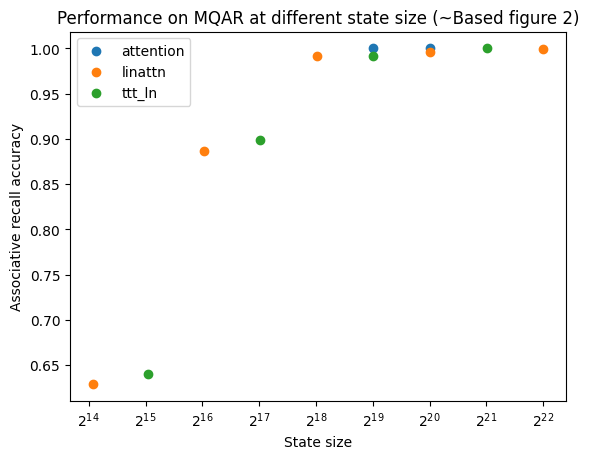

In [5]:
# plot the above as a scatter plot with state_size on x axis and accuracy on y axis
by_state_size = df.groupby(["model.name", "state_size"])["valid/accuracy"].max()
models = ["linattn", "ttt_ln", "attention"]
fig, ax = plt.subplots()
for model_name in by_state_size.index.levels[0]:
    # filter to those in models
    if model_name not in models:
        continue
    ax.scatter(by_state_size[model_name].index, by_state_size[model_name].values, label=model_name)
# log scale base 2 x axis
ax.set_xscale('log', base=2)
# set title
ax.set_title("Performance on MQAR at different state size (~Based figure 2)")
ax.set_xlabel("State size")
ax.set_ylabel("Associative recall accuracy")
plt.legend()

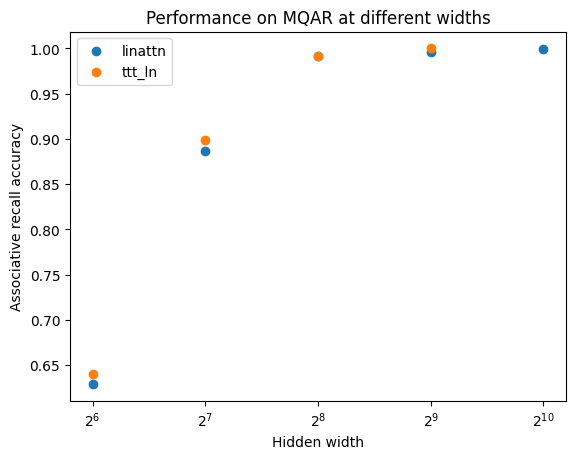

In [5]:
# plot the above as a scatter plot with state_size on x axis and accuracy on y axis
by_state_size = df.groupby(["model.name", "model.d_model"])["valid/accuracy"].max()
models = ["linattn", "ttt_ln"]
fig, ax = plt.subplots()
for model_name in by_state_size.index.levels[0]:
    # filter to those in models
    if model_name not in models:
        continue
    ax.scatter(by_state_size[model_name].index, by_state_size[model_name].values, label=model_name)
# log scale base 2 x axis
ax.set_xscale('log', base=2)
# set title
ax.set_title("Performance on MQAR at different widths")
ax.set_xlabel("Hidden width")
ax.set_ylabel("Associative recall accuracy")
plt.legend()

In [5]:
# Causal linattn is clearly better
df.groupby(["model.name", "model.d_model", "model.sequence_mixer.kwargs.configs.1.kwargs.causal"])["valid/accuracy"].max()

model.name  model.d_model  model.sequence_mixer.kwargs.configs.1.kwargs.causal
linattn     64             False                                                  0.506958
                           True                                                   0.628688
            128            False                                                  0.737982
                           True                                                   0.886289
            256            True                                                   0.991002
            512            True                                                   0.996347
            1024           True                                                   0.998795
Name: valid/accuracy, dtype: float64

In [7]:
df.groupby(["model.name", "learning_rate"])["valid/accuracy"].max()

model.name  learning_rate
attention   0.001000         0.999964
            0.003162         0.999929
            0.010000         0.999964
            0.031623         0.999927
linattn     0.000100         0.998792
            0.000316         0.998795
            0.001000         0.996768
            0.003162         0.990696
            0.010000         0.983704
            0.031623         0.911259
timeswiglu  0.001000         0.981895
            0.003162         0.797646
            0.010000         0.647701
            0.031623         0.462557
ttt         0.001000         0.577348
            0.003162         0.651941
            0.010000         0.688719
            0.031623         0.308720
ttt_ln      0.000100         0.999923
            0.000316         0.999523
            0.001000         0.997770
Name: valid/accuracy, dtype: float64